In [ ]:
import numpy as np
import pandas as pd

#load the testing set
test_data=pd.read_csv('test_new_df.csv')
test_data=test_data.iloc[:,1:5]
test_data.head()

#load the 
m1=pd.read_csv('Predicted_Results_Xception.csv',index_col=False,header=None)
m2=pd.read_csv('Predicted_Results_VGG16.csv',index_col=False,header=None)
m3=pd.read_csv('Predicted_Results_VGG19.csv',index_col=False,header=None)
m4=pd.read_csv('Predicted_Results_Resnet50.csv',index_col=False,header=None)
m5=pd.read_csv('Predicted_Results_Resnet152.csv',index_col=False,header=None)
m6=pd.read_csv('Predicted_Results_InceptionV3.csv',index_col=False,header=None)
m7=pd.read_csv('Predicted_Results_InceptionResNetV2.csv',index_col=False,header=None)
m8=pd.read_csv('Predicted_Results_MobileNetV2.csv',index_col=False,header=None)
m9=pd.read_csv('Predicted_Results_DenseNet201.csv',index_col=False,header=None)
m10=pd.read_csv('Predicted_Results_NasNetMobile.csv',index_col=False,header=None)
m11=pd.read_csv('Predicted_Results_EfficinetNetB7.csv',index_col=False,header=None)


# Load the predicted outputs of top 5 models

In [244]:
#load the predicted outputs of top 5 models
model1=pd.read_csv('Predicted_Results_top1.csv',index_col=False,header=None)

model1=model1.iloc[1:,1:]

model1.columns=['Lable','COVID','Normal','Viral Pneumonia']
model1_Results=model1.iloc[:,0:]

model1_Results['COVID']=model1_Results['COVID'].astype(np.float32)
model1_Results['Normal']=model1_Results['Normal'].astype(np.float32)
model1_Results['Viral Pneumonia']=model1_Results['Viral Pneumonia'].astype(np.float32)

In [ ]:
#load the predicted outputs of top 5 models
model2=pd.read_csv('Predicted_Results_top2.csv',index_col=False,header=None)

model2=model2.iloc[1:,1:]

model2.columns=['Lable','COVID','Normal','Viral Pneumonia']
model2_Results=model2.iloc[:,0:]

model2_Results['COVID']=model2_Results['COVID'].astype(np.float32)
model2_Results['Normal']=model2_Results['Normal'].astype(np.float32)
model2_Results['Viral Pneumonia']=model2_Results['Viral Pneumonia'].astype(np.float32)

In [ ]:
#load the predicted outputs of top 5 models
model3=pd.read_csv('Predicted_Results_top3.csv',index_col=False,header=None)

model3=model3.iloc[1:,1:]

model3.columns=['Lable','COVID','Normal','Viral Pneumonia']
model3_Results=model3.iloc[:,0:]

model3_Results['COVID']=model3_Results['COVID'].astype(np.float32)
model3_Results['Normal']=model3_Results['Normal'].astype(np.float32)
model3_Results['Viral Pneumonia']=model3_Results['Viral Pneumonia'].astype(np.float32)

In [ ]:
#load the predicted outputs of top 5 models
model4=pd.read_csv('Predicted_Results_top4.csv',index_col=False,header=None)

model4=model4.iloc[1:,1:]

model4.columns=['Lable','COVID','Normal','Viral Pneumonia']
model4_Results=model4.iloc[:,0:]

model4_Results['COVID']=model4_Results['COVID'].astype(np.float32)
model4_Results['Normal']=model4_Results['Normal'].astype(np.float32)
model4_Results['Viral Pneumonia']=model4_Results['Viral Pneumonia'].astype(np.float32)

In [ ]:
#load the predicted outputs of top 5 models
model5=pd.read_csv('Predicted_Results_top5.csv',index_col=False,header=None)

model5=model5.iloc[1:,1:]

model5.columns=['Lable','COVID','Normal','Viral Pneumonia']
model5_Results=model5.iloc[:,0:]

model5_Results['COVID']=model5_Results['COVID'].astype(np.float32)
model5_Results['Normal']=model5_Results['Normal'].astype(np.float32)
model5_Results['Viral Pneumonia']=model5_Results['Viral Pneumonia'].astype(np.float32)

In [ ]:
#find the weighted mean probabilities for each class
Combined_C=pd.concat(model1[['COVID']],model2[['COVID']],model3[['COVID']],model4[['COVID']],model5[['COVID']],axis=1)
Combined['Covid']=Combined_C.mean(axis=1)

Combined_P=pd.concat(model1[['Normal']],model2[['Normal']],model3[['Normal']],model4[['Normal']],model5[['Normal']],axis=1)
Combined['Normal']=Combined_P.mean(axis=1)

Combined_P=pd.concat(model1[['Viral Pneumonia']],model2[['Viral Pneumonia']],model3[['Viral Pneumonia']],model4[['Viral Pneumonia']],model5[['Viral Pneumonia']],axis=1)
Combined['Viral Pneumonia']=Combined_P.mean(axis=1)

# Compute the Evaluation Metrics

In [250]:
def true_positives(y, pred, th=0.5):
    """
    Count true positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TP (int): true positives
    """
    TP = 0
    
    # get thresholded predictions
    thresholded_preds = pred > th
    
    # compute TP    
    TP = np.sum((y == 1) & (thresholded_preds == 1))
   
    return TP

def true_negatives(y, pred, th=0.5):
    """
    Count true negatives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        TN (int): true negatives
    """
    TN = 0

    # get thresholded predictions
    thresholded_preds = pred > th


    # compute TN
    TN = np.sum((y == 0) & (thresholded_preds == 0))
    
   
    
    return TN

def false_positives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FP (int): false positives
    """
    FP = 0

    # get thresholded predictions
    thresholded_preds = pred > th

    # compute FP
    FP = np.sum((y == 0) & (thresholded_preds == 1))
  
    return FP

def false_negatives(y, pred, th=0.5):
    """
    Count false positives.

    Args:
        y (np.array): ground truth, size (n_examples)
        pred (np.array): model output, size (n_examples)
        th (float): cutoff value for positive prediction from model
    Returns:
        FN (int): false negatives
    """
    FN = 0

    # get thresholded predictions
    thresholded_preds = pred > th

    # compute FN
    FN = np.sum((y == 1) & (thresholded_preds == 0))

    
    return FN


In [251]:
#this code is derived from AI in medical courses, Coursera

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    average_precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)


def get_true_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 1))


def get_true_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 0))


def get_false_neg(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == False) & (y == 1))


def get_false_pos(y, pred, th=0.5):
    pred_t = (pred > th)
    return np.sum((pred_t == True) & (y == 0))


def get_performance_metrics(y, pred, class_labels, tp=get_true_pos,
                            tn=get_true_neg, fp=get_false_pos,
                            fn=get_false_neg,
                            acc=None, prevalence=None, spec=None,
                            sens=None, ppv=None, npv=None, auc=None, f1=None,
                            thresholds=[]):
    if len(thresholds) != len(class_labels):
        thresholds = [.5] * len(class_labels)

    columns = ["", "TP", "TN", "FP", "FN", "Accuracy", "Prevalence",
               "Sensitivity",
               "Specificity", "PPV", "NPV", "AUC", "F1", "Threshold"]
    df = pd.DataFrame(columns=columns)
    for i in range(len(class_labels)):
        df.loc[i] = [""] + [0] * (len(columns) - 1)
        df.loc[i][0] = class_labels[i]
        df.loc[i][1] = round(tp(y[:, i], pred[:, i]),
                             3) if tp != None else "Not Defined"
        df.loc[i][2] = round(tn(y[:, i], pred[:, i]),
                             3) if tn != None else "Not Defined"
        df.loc[i][3] = round(fp(y[:, i], pred[:, i]),
                             3) if fp != None else "Not Defined"
        df.loc[i][4] = round(fn(y[:, i], pred[:, i]),
                             3) if fn != None else "Not Defined"
        df.loc[i][5] = round(acc(y[:, i], pred[:, i], thresholds[i]),
                             3) if acc != None else "Not Defined"
        df.loc[i][6] = round(prevalence(y[:, i]),
                             3) if prevalence != None else "Not Defined"
        df.loc[i][7] = round(sens(y[:, i], pred[:, i], thresholds[i]),
                             3) if sens != None else "Not Defined"
        df.loc[i][8] = round(spec(y[:, i], pred[:, i], thresholds[i]),
                             3) if spec != None else "Not Defined"
        df.loc[i][9] = round(ppv(y[:, i], pred[:, i], thresholds[i]),
                             3) if ppv != None else "Not Defined"
        df.loc[i][10] = round(npv(y[:, i], pred[:, i], thresholds[i]),
                              3) if npv != None else "Not Defined"
        df.loc[i][11] = round(auc(y[:, i], pred[:, i]),
                              3) if auc != None else "Not Defined"
        df.loc[i][12] = round(f1(y[:, i], pred[:, i] > thresholds[i]),
                              3) if f1 != None else "Not Defined"
        df.loc[i][13] = round(thresholds[i], 3)

    df = df.set_index("")
    return df


def print_confidence_intervals(class_labels, statistics):
    df = pd.DataFrame(columns=["Mean AUC (CI 5%-95%)"])
    for i in range(len(class_labels)):
        mean = statistics.mean(axis=1)[i]
        max_ = np.quantile(statistics, .95, axis=1)[i]
        min_ = np.quantile(statistics, .05, axis=1)[i]
        df.loc[class_labels[i]] = ["%.2f (%.2f-%.2f)" % (mean, min_, max_)]
    return df


def get_curve(gt, pred, target_names, curve='roc'):
    for i in range(len(target_names)):
        if curve == 'roc':
            curve_function = roc_curve
            auc_roc = roc_auc_score(gt[:, i], pred[:, i])
            label = target_names[i] + " AUC: %.3f " % auc_roc
            xlabel = "False positive rate"
            ylabel = "True positive rate"
            a, b, _ = curve_function(gt[:, i], pred[:, i])
            plt.figure(1, figsize=(7, 7))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(a, b, label=label)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)
        elif curve == 'prc':
            precision, recall, _ = precision_recall_curve(gt[:, i], pred[:, i])
            average_precision = average_precision_score(gt[:, i], pred[:, i])
            label = target_names[i] + " Avg.: %.3f " % average_precision
            plt.figure(1, figsize=(7, 7))
            plt.step(recall, precision, where='post', label=label)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.ylim([0.0, 1.05])
            plt.xlim([0.0, 1.0])
            plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                       fancybox=True, ncol=1)
def get_accuracy(y, pred, th=0.5):
   
    accuracy = 0.0
    

    
    # get TP, FP, TN, FN using our previously defined functions
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)

    # Compute accuracy using TP, FP, TN, FN
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    
    return accuracy

def get_prevalence(y):
  
    prevalence = 0.0
    
    
    prevalence = np.mean(y)
    

    
    return prevalence


def get_sensitivity(y, pred, th=0.5):
  
    sensitivity = 0.0

    
    # get TP and FN using our previously defined functions
    TP = true_positives(y, pred, th)
    FN = false_negatives(y, pred, th)

    # use TP and FN to compute sensitivity
    sensitivity = TP / (TP + FN)
    

    
    return sensitivity

def get_specificity(y, pred, th=0.5):
 
    specificity = 0.0
    
    
    # get TN and FP using our previously defined functions
    TN = true_negatives(y, pred, th)
    FP = false_positives(y, pred, th)
    
    # use TN and FP to compute specificity 
    specificity = TN / (TN + FP)

    
    return specificity

def get_ppv(y, pred, th=0.5):
 
    PPV = 0.0
    

    
    # get TP and FP using our previously defined functions
    TP = true_positives(y, pred, th)
    FP = false_positives(y, pred, th)

    # use TP and FP to compute PPV
    PPV = TP / (TP + FP)

    
    return PPV

def get_npv(y, pred, th=0.5):
  
    NPV = 0.0
    

    
    # get TN and FN using our previously defined functions
    TN = true_negatives(y, pred, th)
    FN = false_negatives(y, pred, th)

    # use TN and FN to compute NPV
    NPV = TN / (TN + FN)

    
    return NPV

In [252]:
#extract true label from test data
true_labels=['COVID','Normal','Viral Pneumonia']
y_true=test_data[labels].values

#predicted weighted probabilities of top 5 models

y_pred=Combined[labels].values

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

metrics=get_performance_metrics(y_true,y_pred, labels,acc=get_accuracy, prevalence=get_prevalence,sens=get_sensitivity, spec=get_specificity,ppv=get_ppv, npv=get_npv,auc=roc_auc_score,f1=f1_score)
print(metrics)

metrics.to_csv('Ensemble_SoftVoting_Metrics.csv')

# Plot ROC curve of ensemble classifier

C:\Users\kyada\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


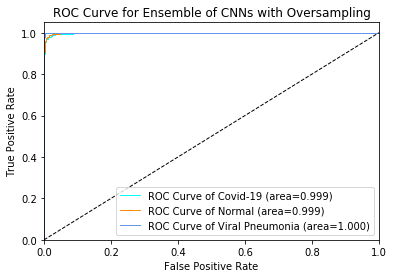

In [256]:
#plot ROC curve of ensemble classifier

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


y_score=pred
y_test=y
n_classes=3
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

plt.plot(fpr[0],tpr[0],color='aqua',lw=1,label='ROC Curve of Covid-19 (area={1:0.3f})'
                                           ''.format(0,roc_auc[0]))
plt.plot(fpr[1],tpr[1],color='darkorange',lw=1,label='ROC Curve of Normal (area={1:0.3f})'
                                           ''.format(1,roc_auc[1]))
plt.plot(fpr[2],tpr[2],color='cornflowerblue',lw=1,label='ROC Curve of Viral Pneumonia (area={1:0.3f})'
                                           ''.format(2,roc_auc[2]))

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble of CNNs with Oversampling')
plt.legend(loc="lower right")
#plt.show()

plt.savefig('ROC for ensemble of oversampled.png')